In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

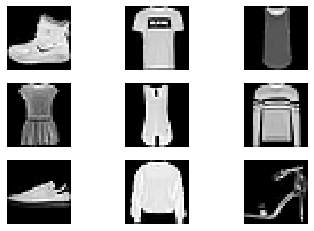

In [3]:
plt.figure()
for k in range(9):
    plt.subplot(3,3,k+1)
    plt.imshow(X_train_full[k], cmap="gray")
    plt.axis('off')
plt.show()

In [4]:
X_valid = X_train_full[:5000] / 255.0
X_train = X_train_full[5000:] / 255.0
X_test = X_test / 255.0

y_valid = y_train_full[:5000]
y_train = y_train_full[5000:]


In [5]:
from functools import partial

my_dense_layer = partial(tf.keras.layers.Dense, activation="relu", kernel_regularizer=tf.keras.regularizers.L1L2(l1=0.0001,l2=0.0001))


model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    my_dense_layer(320),
    my_dense_layer(130),
    my_dense_layer(10, activation="softmax")
])

In [6]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001),
             metrics=["accuracy"])

In [7]:
history = model.fit(X_train, y_train, epochs=8, validation_data=(X_valid,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/8
55000/55000 [==============================] - 6s 109us/sample - loss: 1.0144 - accuracy: 0.8172 - val_loss: 0.7311 - val_accuracy: 0.8370
Epoch 2/8
55000/55000 [==============================] - 5s 95us/sample - loss: 0.6372 - accuracy: 0.8495 - val_loss: 0.5659 - val_accuracy: 0.8618
Epoch 3/8
55000/55000 [==============================] - 5s 95us/sample - loss: 0.5431 - accuracy: 0.8618 - val_loss: 0.5582 - val_accuracy: 0.8510
Epoch 4/8
55000/55000 [==============================] - 5s 94us/sample - loss: 0.5026 - accuracy: 0.8670 - val_loss: 0.4927 - val_accuracy: 0.8726
Epoch 5/8
55000/55000 [==============================] - 5s 94us/sample - loss: 0.4809 - accuracy: 0.8716 - val_loss: 0.4864 - val_accuracy: 0.8684
Epoch 6/8
55000/55000 [==============================] - 5s 95us/sample - loss: 0.4688 - accuracy: 0.8759 - val_loss: 0.4837 - val_accuracy: 0.8676
Epoch 7/8
55000/55000 [==============================] - 5s 94

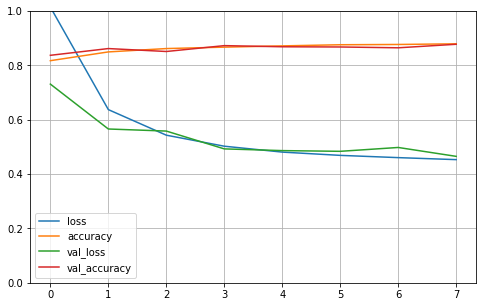

In [8]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [9]:
y_pred = model.predict_classes(X_train)
conf_train = confusion_matrix(y_train, y_pred)
print(conf_train)

[[4757    8   76   65   18    3  561    0   55    0]
 [  12 5339    7   64   10    0   11    0    1    0]
 [  53    8 4377   31  732    0  285    0   10    0]
 [ 252   56   57 4713  289    0  128    0    4    0]
 [  11    9  362   88 4895    0  141    0    6    0]
 [   2    0    0    1    0 5189    0  192   22  101]
 [ 694    7  458   70  727    0 3498    0   53    0]
 [   0    0    0    0    0   44    0 5225    8  211]
 [  12    5   34   20   44    8   39   23 5325    0]
 [   0    1    1    0    0   30    0  149    2 5311]]


In [10]:
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 0s 22us/sample - loss: 0.4949 - accuracy: 0.8680


[0.49494659028053284, 0.868]

In [11]:
y_pred = model.predict_classes(X_test)
conf_test = confusion_matrix(y_test, y_pred)
print(conf_test)

[[836   1  15  17   6   1 112   1  10   1]
 [  3 970   1  18   3   0   4   0   1   0]
 [ 14   1 767   6 151   0  59   0   2   0]
 [ 37  12  15 849  51   0  33   0   3   0]
 [  0   0  86  22 860   0  31   0   1   0]
 [  0   0   0   1   0 928   0  37   1  33]
 [132   1  89  21 147   1 594   0  15   0]
 [  0   0   0   0   0  10   0 950   0  40]
 [  3   1   4   4  13   2   4   4 965   0]
 [  0   0   0   0   0   5   0  33   1 961]]


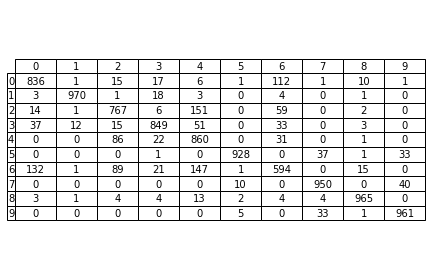

In [12]:
fig, ax = plt.subplots()

# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

# create table and save to file
df = pd.DataFrame(conf_test)
ax.table(cellText=df.values, rowLabels=np.arange(10), colLabels=np.arange(10), loc='center', cellLoc='center')
fig.tight_layout()
plt.savefig('conf_mat1.png')